Experiment 1  - Traffic Prediction Based on Vehicles

Predicting traffic volume based on vehicles.

1. Data Fetching

In [23]:
import pandas as pd

# Loading dataset
dataset1 = pd.read_csv('C:/Users/carol/OneDrive/Documents/Research/Dataset/Traffic_count.csv')

# Filtering rows
years = [2017, 2018, 2019, 2020, 2021]
vehdata = dataset1[dataset1['Year'].isin(years)]

# Sorting in ascending order
vehdata.sort_values(by='Year', ascending=True, inplace=True)

# Saving the fitered data to new dataset
vehdata.to_csv('Trafficdataset.csv')

C:\Users\carol\AppData\Local\Temp\ipykernel_33004\1979629595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehdata.sort_values(by='Year', ascending=True, inplace=True)


In [3]:
#printing the columns
print(vehdata.columns)

Index(['Count_point_id', 'Direction_of_travel', 'Year', 'Count_date', 'hour',
       'Region_id', 'Region_name', 'Region_ons_code', 'Local_authority_id',
       'Local_authority_name', 'Local_authority_code', 'Road_name',
       'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')


In [4]:
#printing the datatypes
print(vehdata.dtypes)

Count_point_id                    int64
Direction_of_travel              object
Year                              int64
Count_date                       object
hour                              int64
Region_id                         int64
Region_name                      object
Region_ons_code                  object
Local_authority_id                int64
Local_authority_name             object
Local_authority_code             object
Road_name                        object
Road_category                    object
Road_type                        object
Start_junction_road_name         object
End_junction_road_name           object
Easting                           int64
Northing                          int64
Latitude                        float64
Longitude                       float64
Link_length_km                  float64
Link_length_miles               float64
Pedal_cycles                      int64
Two_wheeled_motor_vehicles        int64
Cars_and_taxis                  float64


2. Data Cleaning

In [5]:
# Checking for missing values
print(vehdata.isnull().sum())

Count_point_id                       0
Direction_of_travel                  0
Year                                 0
Count_date                           0
hour                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        726060
End_junction_road_name          726012
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  725148
Link_length_miles               725148
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches        

In [6]:
# removing null values 
vehdata.dropna(inplace=True)

C:\Users\carol\AppData\Local\Temp\ipykernel_33004\1973640780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehdata.dropna(inplace=True)


In [7]:
# Printing the number of records
print(f'The dataset contains {len(vehdata)} records.')

The dataset contains 373860 records.


In [8]:
# removing irrelavant columns
vehdata = vehdata.drop(
    ['Region_ons_code', 'Local_authority_name', 'Local_authority_code', 
     'Road_name', 'Start_junction_road_name', 'End_junction_road_name'], axis=1)

In [9]:
# checking for duplicate values
duplicate_count = vehdata.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows.")

There are 0 duplicate rows.


3. Data Transformation

In [10]:
import pandas as pd

# Converting 'Count_date' to datetime format
vehdata['Count_date'] = pd.to_datetime(vehdata['Count_date'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# List of vehicle type columns
vehicle_cols = [
    'Pedal_cycles', 'Two_wheeled_motor_vehicles', 'Cars_and_taxis',
    'Buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle'
]

# Creating a new column for the total vehicle count
vehdata['total_vehicles'] = vehdata[vehicle_cols].sum(axis=1)

4. Data Encoding

In [12]:
# Listing of columns to one-hot encode
cols_to_encode = ['Direction_of_travel', 'Road_category', 'Road_type', 'Region_name']

# Applying one-hot encoding to each column
vehdata = pd.get_dummies(vehdata, columns=cols_to_encode, drop_first=True)

In [13]:
# columns after encoding
vehdata.columns

Index(['Count_point_id', 'Year', 'Count_date', 'hour', 'Region_id',
       'Local_authority_id', 'Easting', 'Northing', 'Latitude', 'Longitude',
       'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles', 'total_vehicles', 'Direction_of_travel_N',
       'Direction_of_travel_S', 'Direction_of_travel_W', 'Road_category_PM',
       'Road_category_TA', 'Road_category_TM', 'Region_name_East of England',
       'Region_name_London', 'Region_name_North East',
       'Region_name_North West', 'Region_name_Scotland',
       'Region_name_South East', 'Region_name_South West', 'Region_name_Wales',
       'Region_name_West Midlands', 'Region_name_Yorkshire and the Humber'],
      dtype='object')

In [14]:
vehdata.dtypes

Count_point_id                                   int64
Year                                             int64
Count_date                              datetime64[ns]
hour                                             int64
Region_id                                        int64
Local_authority_id                               int64
Easting                                          int64
Northing                                         int64
Latitude                                       float64
Longitude                                      float64
Link_length_km                                 float64
Link_length_miles                              float64
Pedal_cycles                                     int64
Two_wheeled_motor_vehicles                       int64
Cars_and_taxis                                 float64
Buses_and_coaches                              float64
LGVs                                             int64
HGVs_2_rigid_axle                              float64
HGVs_3_rig

In [15]:
# Saving the filtered dataset to a new CSV file
vehdata.to_csv('Final_Exp1.csv', index=False)

5. Database 

In [27]:
pip install pandas sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sqlalchemy import create_engine
import pandas as pd

db_type = 'postgresql'  
user = 'postgres'
password = 'user'
host = 'localhost'
port = '5432'  
dbname = 'TrafficData'
table_name = 'Exp1'

# Creating the database engine
engine = create_engine(f'{db_type}://{user}:{password}@{host}:{port}/{dbname}')

# Connecting to the database and download the table into a pandas DataFrame
with engine.connect() as conn, conn.begin():
    vehdata = pd.read_sql_table(table_name, conn)

In [22]:
# printing the data from db
print(vehdata.head())

In [15]:
vehdata.columns

Index(['Count_point_id', 'Year', 'Count_date', 'hour', 'Region_id',
       'Local_authority_id', 'Easting', 'Northing', 'Latitude', 'Longitude',
       'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles', 'total_vehicles', 'Direction_of_travel_N',
       'Direction_of_travel_S', 'Direction_of_travel_W', 'Road_category_PM',
       'Road_category_TA', 'Road_category_TM', 'Region_name_East of England',
       'Region_name_London', 'Region_name_North East',
       'Region_name_North West', 'Region_name_Scotland',
       'Region_name_South East', 'Region_name_South West', 'Region_name_Wales',
       'Region_name_West Midlands', 'Region_name_Yorkshire and the Humber'],
      dtype='object')

6. Normality Test (Skewness and Kurtosis)

In [16]:
import pandas as pd
from scipy import stats

# Defining alpha for hypothesis testing
alpha = 0.05

# Looping through each column in the DataFrame
for column in vehdata.columns:
    # Skipping non-numeric data
    if vehdata[column].dtype not in ['int64', 'float64']:
        continue
    
    stat, p = stats.shapiro(vehdata[column].dropna())  
    print(f'Column: {column}')
    print(f'  p-value: {p}')
    if p > alpha:
        print('  Data follows a normal distribution (fail to reject H0)\n')
    else:
        print('  Data does not follow a normal distribution (reject H0)\n')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column: Count_point_id
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Year
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: hour
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Region_id
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Local_authority_id
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Easting
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Northing
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Latitude
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Longitude
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Link_length_km
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Link_length_miles
  p-value: 0.0
  Data does not follow a normal distribution

In [17]:
import pandas as pd
from scipy.stats import skew, kurtosis

skewness_total_vehicles = skew(vehdata['total_vehicles'])
kurtosis_total_vehicles = kurtosis(vehdata['total_vehicles'], fisher=True)  

print(f"Skewness for 'total_vehicles' column: {skewness_total_vehicles}")
print(f"Kurtosis for 'total_vehicles' column: {kurtosis_total_vehicles}")

Skewness for 'total_vehicles' column: 2.15774557302573
Kurtosis for 'total_vehicles' column: 5.661693913006111


In [18]:
vehdata.columns

Index(['Count_point_id', 'Year', 'Count_date', 'hour', 'Region_id',
       'Local_authority_id', 'Easting', 'Northing', 'Latitude', 'Longitude',
       'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles', 'total_vehicles', 'Direction_of_travel_N',
       'Direction_of_travel_S', 'Direction_of_travel_W', 'Road_category_PM',
       'Road_category_TA', 'Road_category_TM', 'Region_name_East of England',
       'Region_name_London', 'Region_name_North East',
       'Region_name_North West', 'Region_name_Scotland',
       'Region_name_South East', 'Region_name_South West', 'Region_name_Wales',
       'Region_name_West Midlands', 'Region_name_Yorkshire and the Humber'],
      dtype='object')

7. Stationarity test 

In [71]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the 'total_vehicles' column
result = adfuller(vehdata['total_vehicles'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Determine if the series is stationary based on the ADF test
if result[1] < 0.05:  # using an alpha of 0.05
    print('Time series is stationary (reject H0)')
else:
    print('Time series is not stationary (fail to reject H0)')

ADF Statistic: -55.800115
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time series is stationary (reject H0)


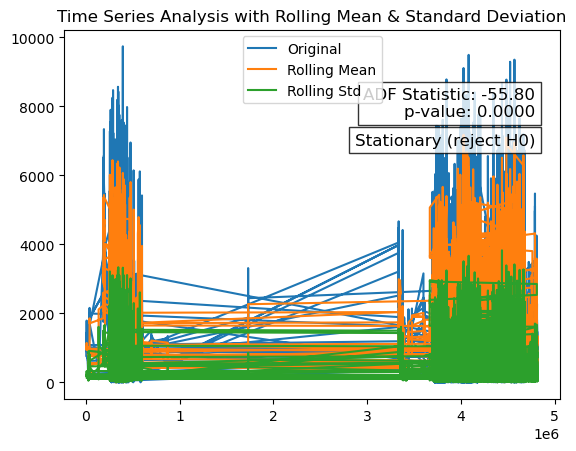

In [21]:
import matplotlib.pyplot as plt

# Rolling statistics
rolling_mean = vehdata['total_vehicles'].rolling(window=12).mean()
rolling_std = vehdata['total_vehicles'].rolling(window=12).std()

# Plotting the statistics along with the time series data
plt.plot(vehdata['total_vehicles'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
# Annotating the plot with ADF Test results
plt.title('Time Series Analysis with Rolling Mean & Standard Deviation')
plt.text(0.95, 0.8, f'ADF Statistic: {result[0]:.2f}\np-value: {result[1]:.4f}', 
         horizontalalignment='right', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Check if the series is stationary and annotate
stationarity_status = 'Stationary (reject H0)' if result[1] < 0.05 else 'Not Stationary (fail to reject H0)'
plt.text(0.95, 0.7, stationarity_status, 
         horizontalalignment='right', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

8. Visualisation

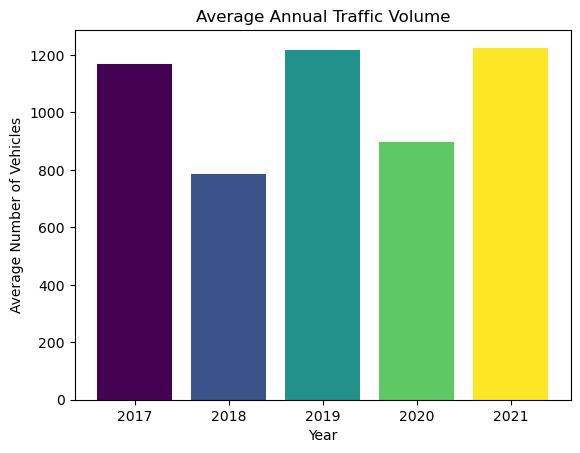

In [49]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

yearly_traffic = vehdata.groupby('Year')['total_vehicles'].mean().reset_index()

# Creating a color map
years = yearly_traffic['Year']
colors = cm.viridis(np.linspace(0, 1, len(years)))

# Plotting the bar chart with the colormap
plt.bar(yearly_traffic['Year'], yearly_traffic['total_vehicles'], color=colors)
plt.xlabel('Year')
plt.ylabel('Average Number of Vehicles')
plt.title('Average Annual Traffic Volume')
plt.show()

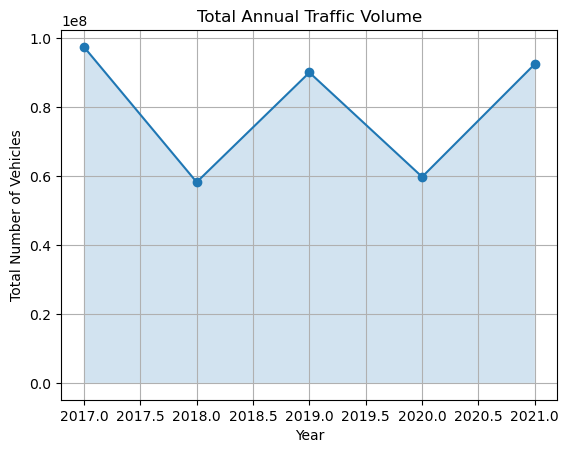

In [18]:
yearly_traffic = vehdata.groupby('Year')['total_vehicles'].sum().reset_index()

plt.fill_between(yearly_traffic['Year'], yearly_traffic['total_vehicles'], alpha=0.2)
plt.plot(yearly_traffic['Year'], yearly_traffic['total_vehicles'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicles')
plt.title('Total Annual Traffic Volume')
plt.grid(True)
plt.show()

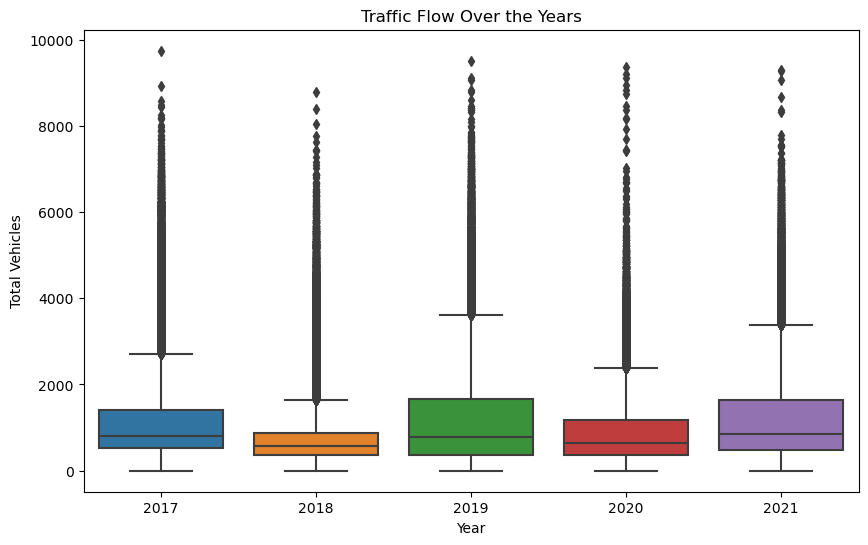

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming vehdata is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='total_vehicles', data=vehdata)
plt.title('Traffic Flow Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Vehicles')
plt.show()

9. Correlation Analysis

In [94]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant features including the target variable
selected_features = ['hour', 'Year', 'Pedal_cycles', 'Two_wheeled_motor_vehicles', 'Cars_and_taxis',
                     'Buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
                     'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
                     'total_vehicles']  

# Creating a new dataframe with the selected features
feature_data = vehdata[selected_features]

# Calculating the correlation matrix
correlation_matrix = feature_data.corr()

correlation_with_target = correlation_matrix['total_vehicles'].sort_values(ascending=False)

print(correlation_with_target)

total_vehicles                  1.000000
Cars_and_taxis                  0.983427
LGVs                            0.923228
HGVs_2_rigid_axle               0.780668
All_HGVs                        0.765677
HGVs_3_rigid_axle               0.684567
HGVs_6_articulated_axle         0.627171
HGVs_3_or_4_articulated_axle    0.626208
HGVs_4_or_more_rigid_axle       0.615274
HGVs_5_articulated_axle         0.600906
Two_wheeled_motor_vehicles      0.351001
Buses_and_coaches               0.154098
Year                            0.029904
hour                            0.025565
Pedal_cycles                   -0.032503
Name: total_vehicles, dtype: float64


10. Model Building using LSTM

Feature Selection and Data Splitting 

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Feature Selection based on Correlation Analysis
selected_features = [
    'Cars_and_taxis', 'LGVs', 'HGVs_2_rigid_axle', 'All_HGVs',
    'HGVs_3_rigid_axle', 'HGVs_6_articulated_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_5_articulated_axle',
    'Two_wheeled_motor_vehicles', 'Buses_and_coaches', 'Year', 'hour', 'Pedal_cycles'
]

# Preparing the dataset for modeling
features = vehdata[selected_features]
target = vehdata['total_vehicles']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [115]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2)) 
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Printing the model summary
model.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred = model.predict(X_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                13000     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13051 (50.98 KB)
Trainable params: 13051 (50.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
5982/5982 [==============================] - 38s 6ms/step - loss: 1913591.6250 - val_loss: 1719693.8750
Epoch 2/50
5982/5982 [==============================] - 33s 6ms/step - loss: 1545103.7500 - val_loss: 1413014.8750
Epoch 3/50
5982/5982 [==============================

In [116]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Calculating evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Output the metrics for the training set
print('Training Values for LSTM: ')
print('Training Mean Squared Error:', mse_train)
print('Training Root Mean Squared Error:', rmse_train)
print('Training Mean Absolute Error:', mae_train)
print('Training R-squared:', r2_train)

# Output the metrics for the test set 
print('Testing Values for LSTM: ')
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)
print('Test Mean Absolute Error:', mae)
print('Test R-squared:', r2)

9347/9347 [==============================] - 27s 3ms/step
Training Values for LSTM: 
Training Mean Squared Error: 2866.8542693254594
Training Root Mean Squared Error: 53.54301326340776
Training Mean Absolute Error: 9.953320852017534
Training R-squared: 0.9972613596062934
Testing Values for LSTM: 
Test Mean Squared Error: 2613.6192631292106
Test Root Mean Squared Error: 51.123568568021646
Test Mean Absolute Error: 9.80746580526023
Test R-squared: 0.9975185974672297


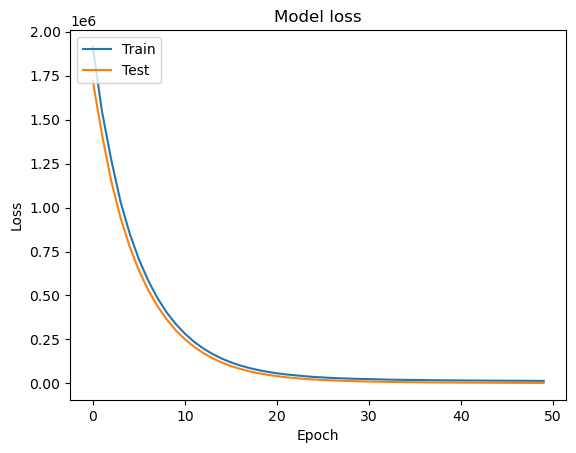

In [117]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

11. Model Building using GRU

Feature Selection and Data Spliting 

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Feature Selection based on Correlation Analysis
selected_features = [
    'Cars_and_taxis', 'LGVs', 'HGVs_2_rigid_axle', 'All_HGVs',
    'HGVs_3_rigid_axle', 'HGVs_6_articulated_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_5_articulated_axle',
    'Two_wheeled_motor_vehicles', 'Buses_and_coaches', 'Year', 'hour', 'Pedal_cycles'
]

# Preparing the dataset for modeling
features = vehdata[selected_features]
target = vehdata['total_vehicles']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape for GRU
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [119]:
# Building the GRU model
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dropout(0.2)) 
model_gru.add(Dense(1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print the model summary
model_gru.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model with early stopping
history = model_gru.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

# Evaluating the model
loss = model_gru.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred = model_gru.predict(X_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                9900      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9951 (38.87 KB)
Trainable params: 9951 (38.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
5982/5982 [==============================] - 42s 6ms/step - loss: 1850179.6250 - val_loss: 1615243.8750
Epoch 2/50
5982/5982 [==============================] - 39s 6ms/step - loss: 1422038.8750 - val_loss: 1280109.5000
Epoch 3/50
5982/5982 [==============================] 

In [120]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Calculating evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Output the metrics for the training set
print('Training Values for GRU: ')
print('Training Mean Squared Error:', mse_train)
print('Training Root Mean Squared Error:', rmse_train)
print('Training Mean Absolute Error:', mae_train)
print('Training R-squared:', r2_train)

# Output the metrics for the test set 
print('Testing Values for GRU: ')
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)
print('Test Mean Absolute Error:', mae)
print('Test R-squared:', r2)

9347/9347 [==============================] - 27s 3ms/step
Training Values for GRU: 
Training Mean Squared Error: 2866.8542693254594
Training Root Mean Squared Error: 53.54301326340776
Training Mean Absolute Error: 9.953320852017534
Training R-squared: 0.9972613596062934
Testing Values for GRU: 
Test Mean Squared Error: 1183.6602182549261
Test Root Mean Squared Error: 34.404363360697815
Test Mean Absolute Error: 8.474487739256475
Test R-squared: 0.9988762183134506


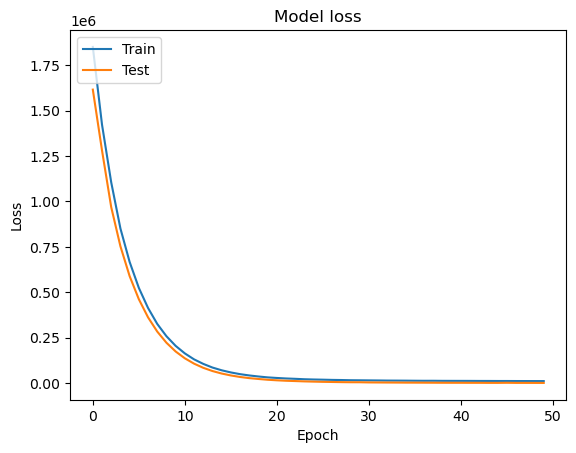

In [121]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

12. Model Building using CNN

Feature Selection and Data Spliting

In [122]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Feature Selection based on Correlation Analysis
selected_features = [
    'Cars_and_taxis', 'LGVs', 'HGVs_2_rigid_axle', 'All_HGVs',
    'HGVs_3_rigid_axle', 'HGVs_6_articulated_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_5_articulated_axle',
    'Two_wheeled_motor_vehicles', 'Buses_and_coaches', 'Year', 'hour', 'Pedal_cycles'
]

# Preparing the dataset for modeling
features = vehdata[selected_features]
target = vehdata['total_vehicles']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape input for CNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [123]:
# Building the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Printing the model summary
model_cnn.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model with early stopping
history = model_cnn.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

# Evaluating the model
loss = model_cnn.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred = model_cnn.predict(X_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                19250     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                      

In [125]:
# predictions on training set for CNN
y_train_pred_cnn = model_cnn.predict(X_train)

# calculations of evaluation metrics for the training set of CNN
mse_train_cnn = mean_squared_error(y_train, y_train_pred_cnn)
rmse_train_cnn = np.sqrt(mse_train_cnn)
mae_train_cnn = mean_absolute_error(y_train, y_train_pred_cnn)
r2_train_cnn = r2_score(y_train, y_train_pred_cnn)

# Output the correct metrics for the training set of CNN
print('Training Values for CNN: ')
print('Training Mean Squared Error:', mse_train_cnn)
print('Training Root Mean Squared Error:', rmse_train_cnn)
print('Training Mean Absolute Error:', mae_train_cnn)
print('Training R-squared:', r2_train_cnn)

# Ensure you are using the correct model for test set predictions as well
y_pred_cnn = model_cnn.predict(X_test)

# Calculate the evaluation metrics for the test set of CNN
mse_test_cnn = mean_squared_error(y_test, y_pred_cnn)
mae_test_cnn = mean_absolute_error(y_test, y_pred_cnn)
rmse_test_cnn = np.sqrt(mse_test_cnn)
r2_test_cnn = r2_score(y_test, y_pred_cnn)

# Output the metrics for the test set of CNN
print('Testing Values for CNN: ')
print('Test Mean Squared Error:', mse_test_cnn)
print('Test Root Mean Squared Error:', rmse_test_cnn)
print('Test Mean Absolute Error:', mae_test_cnn)
print('Test R-squared:', r2_test_cnn)


9347/9347 [==============================] - 22s 2ms/step
Training Values for CNN: 
Training Mean Squared Error: 8045.51928841366
Training Root Mean Squared Error: 89.69681871958258
Training Mean Absolute Error: 41.0673358894712
Training R-squared: 0.9923142992138279
2337/2337 [==============================] - 5s 2ms/step
Testing Values for CNN: 
Test Mean Squared Error: 7782.875646874932
Test Root Mean Squared Error: 88.22060783555581
Test Mean Absolute Error: 40.73667280995265
Test R-squared: 0.9926108413666688


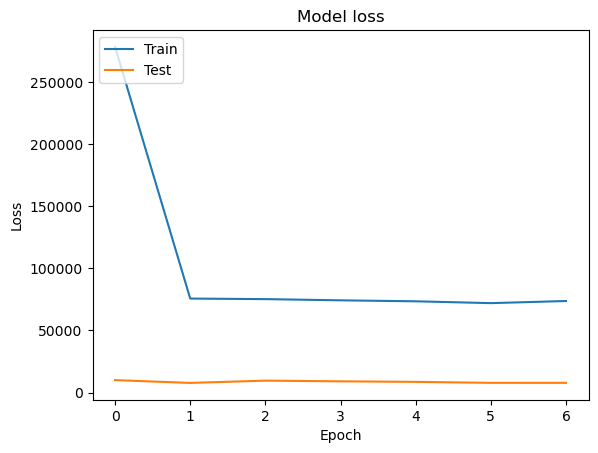

In [126]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()